<a href="https://colab.research.google.com/github/monirminaee/test2/blob/main/Copy_of_code_20250927_0928.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install ortools
!pip install shapely
! pip install alphashape
from ortools.sat.python import cp_model
import random
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial import ConvexHull
import alphashape
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from openpyxl import load_workbook

# 1️⃣ آپلود فایل
uploaded = files.upload()
file_path = list(uploaded.keys())[0]  # نام فایل آپلود شده

# 2️⃣ خواندن شیت دوم
df_second_sheet = pd.read_excel(file_path, sheet_name=1)

# 3️⃣ گرفتن 50 رکورد اول
df_first_50 = df_second_sheet.head(50)

# 4️⃣ پیدا کردن دو ستون عددی اول برای مختصات
numeric_cols = df_first_50.select_dtypes(include=np.number).columns
coords = df_first_50[numeric_cols[:2]].to_numpy()

Saving regions.xlsx to regions (3).xlsx


Cluster 0: Shape method/alpha = ConvexHull
Cluster 1: Shape method/alpha = ConvexHull
Cluster 2: Shape method/alpha = ConvexHull


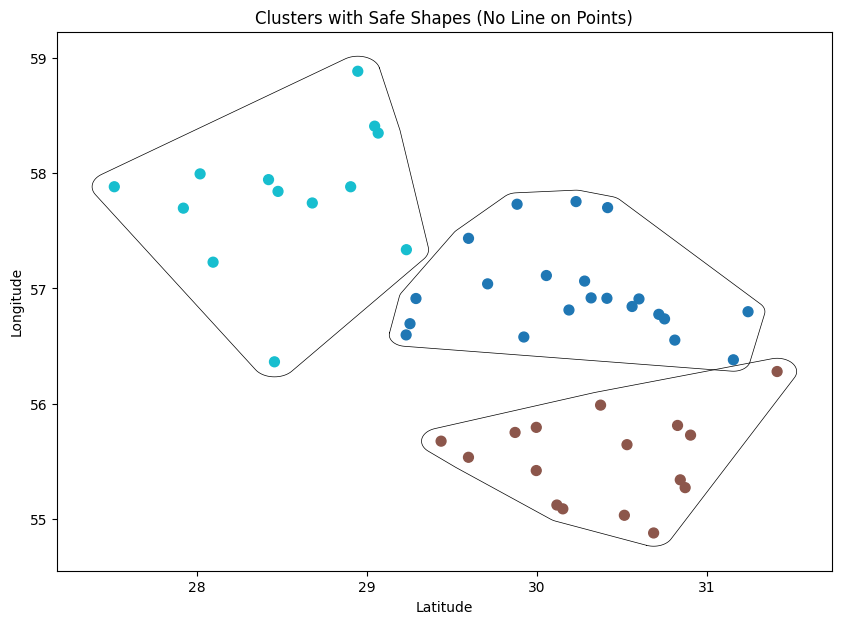

فایل جدید با شیت سوم ساخته شد ✅


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# 5️⃣ خوشه‌بندی
bandwidth = estimate_bandwidth(coords, quantile=0.2)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(coords)
labels = ms.labels_
n_clusters = len(np.unique(labels))

# 6️⃣ تابع شکل محاط کننده امن با اصلاح برای 1 یا 2 نقطه
def safe_shape(cluster_coords, alpha_start=0.01, alpha_step=0.01, alpha_max=10):
    points = [Point(p) for p in cluster_coords]
    center = cluster_coords.mean(axis=0)
    distances = np.linalg.norm(cluster_coords - center, axis=1)
    margin = 0.09 * distances.max()

    if len(cluster_coords) == 1:
        return Point(cluster_coords[0]).buffer(margin), 'Point'
    elif len(cluster_coords) == 2:
        # ایجاد یک مستطیل کوچک حول دو نقطه
        p1, p2 = cluster_coords
        rect = Polygon([
            p1, [p1[0], p2[1]], p2, [p2[0], p1[1]]
        ])
        return rect.buffer(margin), 'Line'

    # α-shape
    alpha = alpha_start
    while alpha <= alpha_max:
        shape = alphashape.alphashape(cluster_coords, alpha)
        if shape.geom_type in ['Polygon', 'MultiPolygon']:
            if all([shape.contains(p) for p in points]):
                shape = shape.buffer(margin)
                return shape, alpha
        alpha += alpha_step

    # ConvexHull
    hull = ConvexHull(cluster_coords)
    hull_coords = cluster_coords[hull.vertices]
    shape = Polygon(hull_coords).buffer(margin)
    return shape, 'ConvexHull'

# 7️⃣ رسم خوشه‌ها و شکل‌ها
plt.figure(figsize=(10,7))
plt.scatter(coords[:,0], coords[:,1], c=labels, cmap='tab10', s=50)

for cluster_id in range(n_clusters):
    cluster_points = coords[labels == cluster_id]
    shape, alpha_used = safe_shape(cluster_points)
    print(f"Cluster {cluster_id}: Shape method/alpha = {alpha_used}")

    if shape.geom_type == 'Polygon':
        xs, ys = shape.exterior.xy
        plt.plot(xs, ys, color='black', linewidth=0.5, linestyle='-')
    elif shape.geom_type == 'MultiPolygon':
        for poly in shape.geoms:
            xs, ys = poly.exterior.xy
            plt.plot(xs, ys, color='black', linewidth=0.5, linestyle='-')

plt.title("Clusters with Safe Shapes (No Line on Points)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


new_file_path = "clustered_output.xlsx"

# --- ذخیره داده برای خروجی Excel ---
output_rows = []

for cluster_id in range(n_clusters):
    cluster_points = coords[labels == cluster_id]
    shape, alpha_used = safe_shape(cluster_points)
    for pt in cluster_points:
        output_rows.append({
            'Latitude': pt[0],
            'Longitude': pt[1],
            'Cluster_ID': cluster_id,
            'Shape_Type_or_Alpha': alpha_used
        })

df_output = pd.DataFrame(output_rows)

# --- ذخیره و دانلود فایل Excel ---
output_filename = "cluster_output.xlsx"
df_output.to_excel(output_filename, index=False)
print("فایل جدید محتوی خوشه بندی انجام شده در شیت اول ساخته شد ✅")

# آماده دانلود کردن فایل
files.download(output_filename)


In [15]:
styles = ['','.','..', '-']
KOLORS = ['rosybrown','blue','green','lime','navy','black','brown', 'yellow','cyan','olive',
          'orange','darkgoldenrod','pink','mediumslateblue','olive','hotpink','gold','magenta','gray','lightseagreen',
          'crimson','limdarkgray','peru','orchid','saddlebrown','violet','teal','tomato','plum','chocolate']
time_window = {1:'8-10', 2:'10-12', 3:'12-14', 4:'14-16', 5:'16-18', 6:'18-20'}
salary_window = {1:1700, 2:1500, 3:1200, 4:1000, 5:900, 6:800}
M=50
n=30
vhcl=30
l=3
#-----مقادیر از ورودی
#n = int(input("How many patients do you have? "))
#cg = int(input("How many caregiver do you have? "))

# 1️⃣ آپلود فایل
uploaded = files.upload()
file_path = list(uploaded.keys())[0]  # نام فایل آپلود شده

# 2️⃣ خواندن شیت اول
df_second_sheet = pd.read_excel(file_path, sheet_name=0)

# 3️⃣ گرفتن 50 رکورد اول
df_first_50 = df_second_sheet.head(50)

# 4️⃣ پیدا کردن دو ستون عددی اول برای مختصات
numeric_cols = df_first_50.select_dtypes(include=np.number).columns
coords = df_first_50[numeric_cols[:2]].to_numpy()
nodes = [i for i in range(1,1+n)]
vehicles = [i for i in range(1+n,1+vhcl+n)]
points = nodes + vehicles

data = {}
alldata={}
data = {}

for n, (x, y) in enumerate(coords):
    data[n] = (x, y)

# نمایش نمونه
for k, v in list(data.items())[:5]:
    print(f"{k}: {v}")

KeyboardInterrupt: 

In [ ]:
styles = ['','.','..', '-']
KOLORS = ['rosybrown','blue','green','lime','navy','black','brown', 'yellow','cyan','olive',
          'orange','darkgoldenrod','pink','mediumslateblue','olive','hotpink','gold','magenta','gray','lightseagreen',
          'crimson','limdarkgray','peru','orchid','saddlebrown','violet','teal','tomato','plum','chocolate']
time_window = {1:'8-10', 2:'10-12', 3:'12-14', 4:'14-16', 5:'16-18', 6:'18-20'}
salary_window = {1:1700, 2:1500, 3:1200, 4:1000, 5:900, 6:800}
M=50
n=50
vhcl=50
l=3
#-----مقادیر از ورودی
#n = int(input("How many patients do you have? "))
#cg = int(input("How many caregiver do you have? "))

nodes = [i for i in range(1,1+n)]
vehicles = [i for i in range(1+n,1+vhcl+n)]
points = nodes + vehicles

data = {}
alldata={}
#data(xi,yi,demandi,nead_levele,time_customer_satisfy)
for n in nodes:
  #data[n] = (random.random(), random.random(),random.randint(30,8*60),random.randint(1,3),random.randint(1,6))
  data[n] = (round(random.random(),3), round(random.random(),3),random.randint(15,8*60),random.randint(1,3),random.randint(1,6))
  alldata[n]=data[n]

vhcl_capacitis = {}
#vhcl_capacitis(xi,yi,time_work_i,expert_level,time_service_satisfy)
for i in vehicles:
  #vhcl_capacitis[i] =(random.random(), random.random(),random.randint(8*60,12*60),random.randint(3,4),random.randint(1,6))
  vhcl_capacitis[i] =(round(random.random(),3), round(random.random(),3),random.randint(8*60,12*60),random.randint(3,4),random.randint(1,6))

  alldata[i]=vhcl_capacitis[i]
print('nodes:',nodes)
print('vehicles:',vehicles)
print('data:',data)
print('vhcl_capacitis:',vhcl_capacitis)
print('alldata',alldata)
print('points:',points)
#print(data[2][4])

def distance(n:int,m:int,data:dict) -> int:
  x1,y1 = data[n][0], data[n][1]
  x2,y2 = data[m][0], data[m][1]
  return int(100 * np.sqrt( (x1-x2)**2 + (y1-y2)**2))
print('distance(1,2,data)',distance(1,2,data))

def main() -> None:

    model = cp_model.CpModel()
    #x = {(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}")for i in nodes         for j in nodes for c in vehicles if i!=j }
    assign = {(i,c):model.NewBoolVar(f"assign_{i}_{c}")for i in nodes for c in vehicles }
    used_vehicle = {c:model.NewBoolVar(f"used_{c}") for c in vehicles}
    rout = {(i,c):model.NewBoolVar(f"assign_{i}_{c}")for i in points for c in vehicles }
    y = {(i,j,c):model.NewBoolVar(f"flow_{i}_{j}_{c}")for i in points
         for j in points for c in vehicles if i!=j }


    for i in nodes:
      expr_aasign = [assign[i,c] for c in vehicles]
      model.AddExactlyOne(expr_aasign)

    for (i,c),v in assign.items():
      model.Add(v <= used_vehicle[c])
      model.Add(v == rout[i,c])
      ex_capacity= vhcl_capacitis[c][3] - data[i][3]
      model.Add(ex_capacity >= 0)

    for c in vehicles:
      model.Add(rout[c,c]==used_vehicle[c])
      #arcsx = [(i,j,v) for (i,j,cc),v in x.items() if cc==c ] + [(i,i,assign[i,c].Not()) for i in nodes]
      arcsy = [(i,j,v) for (i,j,cc),v in y.items() if cc==c ] + [(i,i,rout[i,c].Not()) for i in points]
      model.AddCircuit(arcsy)

      expr_cap = [v * alldata[i][2] for (i,cc),v in assign.items() if cc==c  ]
      model.Add(sum(expr_cap) <= ( vhcl_capacitis[c][2]) )

    #objective function
    expressions_vehicle_OF=[v * distance(i,j,alldata) for (i,j,c),v in y.items() ]
    expressions_salary1_OF = [500 * used_vehicle[c] for c in vehicles ]
    expressions_salary2_OF = [v * (salary_window[vhcl_capacitis[c][4]])  for (i,c),v in assign.items() ]

    model.minimize(sum(expressions_vehicle_OF)+ sum(expressions_salary1_OF) + sum(expressions_salary2_OF))

    solver = cp_model.CpSolver()
    #solver.parameters.max_time_in_seconds = 90
    status =solver.solve(model)
    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
      print(f"min of objective function: {solver.objective_value}\n")

      plt.figure(figsize=(6,6))
      X = [data[n][0] for n in data if data[n][3]==1]
      Y = [data[n][1] for n in data if data[n][3]==1]
      plt.scatter(X,Y,marker='o',s=100)

      X = [data[n][0] for n in data if data[n][3]==2]
      Y = [data[n][1] for n in data if data[n][3]==2]
      plt.scatter(X,Y,marker='^',s=100)

      X = [data[n][0] for n in data if data[n][3]==3]
      Y = [data[n][1] for n in data if data[n][3]==3]
      plt.scatter(X,Y,marker='*',s=100)

      count_used=vhcl
      unused=[]
      used=[]
      for (c),v in used_vehicle.items():
         if solver.value(v)<1:
          count_used=count_used-1
          unused=unused+[c]
         else:
          used=used+[c]
          X = [vhcl_capacitis[c][0] ]
          Y = [vhcl_capacitis[c][1] ]
          plt.scatter(X,Y,marker='P',s=100,color='red')


      print(count_used ,'of the vehicles is in used:',used)
      if len(unused)>0 :
        print(unused ,'not in used.')

      for cc in vehicles:
          list_vhcl=[]
          times=0
          for (i,c),v in rout.items():
            if solver.value(v)>0 and c==cc  :
              print('solution',i,c,solver.value(v))
              list_vhcl=list_vhcl+[i]
              times=times + alldata[i][2]
          if len(list_vhcl) >0  :
              print("cargivers {} by rout colour {} is visited {} in {} minute.".format(cc, KOLORS[cc-n], list_vhcl,times))

      for (i,j,c),v in y.items():
        if solver.value(v) > 0 :
          print('(i,j,c),v',i,j,c,solver.value(v))
          xi,yi = alldata[i][0], alldata[i][1]
          xj,yj = alldata[j][0], alldata[j][1]
          plt.plot([xi,xj],[yi,yj], lw=1 , label='vehicle ' + str(c), color=KOLORS[c-n] )
          plt.text(xi,yi,s=str(i))


      plt.legend(['service_level '+str(i) for i in range(1,l+1)],loc='upper right', fontsize='small',ncol=1)
      #plt.legend(['vehicle ' + str(c) for c in used ],loc='upper right', fontsize='small')
      #legend_lv=plt.legend(['service level '+str(i) for i in range(1,l+1)],bbox_to_anchor=(0.75, 1.15), ncol=l)
      #plt.legend(used,loc='upper right', fontsize='small')

      plt.xlabel(" X ")
      plt.ylabel(" Y ")
      plt.grid()

    else:
      print("No solution found.")

if __name__ == "__main__":
  main()
